<a href="https://colab.research.google.com/github/Nadiam75/DeepLearning_HW_3/blob/main/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### imports, constants, functions

In [585]:
import tensorflow as tf
import numpy as np
import math, random
import matplotlib.pyplot as plt
from scipy import signal
from random import randrange
from numpy import random

In [620]:
def make_noisy(Y, noise_range=(-0.35, 0.35)):
    noise = np.zeros(Y.shape)
    if randrange(2) == 0 :
      noise = np.random.uniform(noise_range[0], noise_range[1], size=Y.shape)
    else:
      noise = np.random.normal(0,0.25,Y.shape)
    return Y + noise


In [621]:
def calc_power(x):
  s=np.square(x)
  average = sum(s) / len(s)
  return average

In [622]:
def calc_SNR(reference, signal):
    noise = signal-reference

    powS = calc_power(signal)
    powN = calc_power(noise)
    if powN !=0:
      return 10*math.log10(powS/powN)
    else:
      return "ERROR"


In [623]:
figSize = (15,3)
samplingConst =  100
timePoints = np.linspace(0, 1, 1000 * samplingConst)

###sawtooth

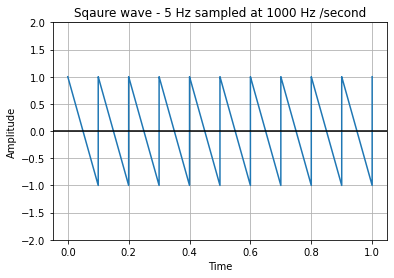

In [624]:
SAWTOOTH = signal.sawtooth(-2 * np.pi * 10 * timePoints  - 0.0004)
plt.plot(timePoints, SAWTOOTH )
plt.title('Sqaure wave - 5 Hz sampled at 1000 Hz /second')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.ylim(-2, 2)
plt.show()

### triangle

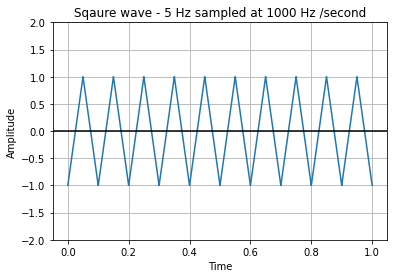

In [625]:
TRIANGLE = signal.sawtooth(2 * np.pi * 10 * timePoints, 0.5)
plt.plot(timePoints, TRIANGLE)
plt.title('Sqaure wave - 5 Hz sampled at 1000 Hz /second')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.ylim(-2, 2)
plt.show()

### sine

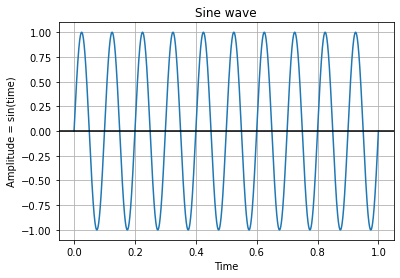

In [626]:
SINE   = np.sin(2 * np.pi *10* timePoints)
plt.plot(timePoints, SINE)
plt.title('Sine wave') 
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)') 
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()
# Display the sine wave

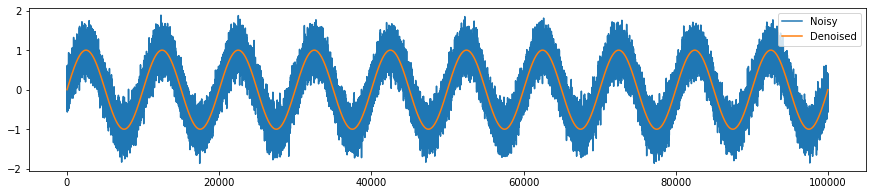

In [627]:
plt.figure(figsize = figSize)
plt.plot( make_noisy(SINE), label='Noisy')
plt.plot(SINE, label ='Denoised')
plt.legend()

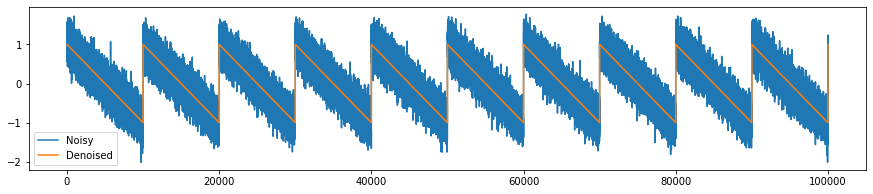

In [628]:
plt.figure(figsize =figSize)
plt.plot( make_noisy(SAWTOOTH), label='Noisy')
plt.plot(SAWTOOTH, label ='Denoised')
plt.legend()

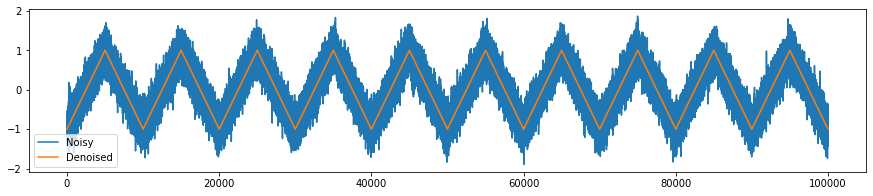

In [629]:
plt.figure(figsize = figSize)
plt.plot( make_noisy(TRIANGLE), label='Noisy')
plt.plot(TRIANGLE, label ='Denoised')
plt.legend()

### Sine wave noise removal using RNN and LSTM 

In [630]:
denoised = SINE
noisy= make_noisy(SINE)
y_train , y_validation , y_test = denoised[ :700*samplingConst  ]   , denoised[ 700*samplingConst:800*samplingConst ]  , denoised[ 800*samplingConst: ] 
x_train , x_validation , x_test = noisy[ :700*samplingConst ]   , noisy[ 700*samplingConst:800*samplingConst  ]  , noisy[ 800*samplingConst: ]

In [632]:
x_train = x_train.reshape((700,samplingConst,1))
x_validation = x_validation.reshape((100,samplingConst,1))
x_test = x_test.reshape((200,samplingConst,1))

y_train = y_train.reshape((700,samplingConst,1))
y_validation = y_validation.reshape((100,samplingConst,1))
y_test = y_test.reshape((200,samplingConst,1))

In [633]:
# SimpleRNN
SimpleRNNmodel=tf.keras.models.Sequential()
SimpleRNNmodel.add(tf.keras.layers.SimpleRNN(30, input_shape = (samplingConst,1) ,  activation='tanh' ))
SimpleRNNmodel.add(tf.keras.layers.Dense(samplingConst, activation='tanh'))
SimpleRNNmodel.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history1 = SimpleRNNmodel.fit(x_train, y_train, epochs=6, batch_size= 1, validation_data= (x_validation , y_validation),  verbose=1)

Epoch 1/6
700/700 [==============================] - 10s 14ms/step - loss: 0.0538 - val_loss: 0.0210
Epoch 2/6
700/700 [==============================] - 9s 13ms/step - loss: 0.0141 - val_loss: 0.0086
Epoch 3/6
700/700 [==============================] - 9s 13ms/step - loss: 0.0089 - val_loss: 0.0091
Epoch 4/6
700/700 [==============================] - 9s 13ms/step - loss: 0.0121 - val_loss: 0.0085
Epoch 5/6
700/700 [==============================] - 9s 13ms/step - loss: 0.0092 - val_loss: 0.0083
Epoch 6/6
700/700 [==============================] - 9s 13ms/step - loss: 0.0100 - val_loss: 0.0062


Text(0.5, 1.0, 'simple RNN, SINE, Loss History')

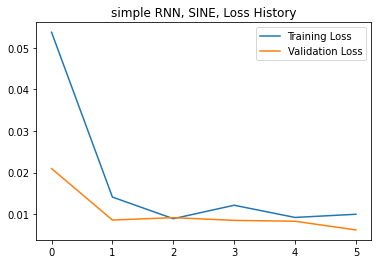

In [634]:
fig = plt.figure()
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('simple RNN, SINE, Loss History')

In [635]:
generated_output = SimpleRNNmodel.predict(x_test)
reshaped_generated_output = generated_output.reshape( (200*samplingConst,1))
noisyInput = x_test.reshape( (200*samplingConst,1))
desiredDenoisedOutput = y_test.reshape(200*samplingConst,1)

In [636]:
SNR_BEFORE_SINE_RNN = calc_SNR( desiredDenoisedOutput , noisyInput )
SNR_AFTER_SINE_RNN = calc_SNR( desiredDenoisedOutput , reshaped_generated_output )

In [637]:
SNR_BEFORE_SINE_RNN

9.581515671992268

In [638]:
SNR_AFTER_SINE_RNN

18.49842130692618

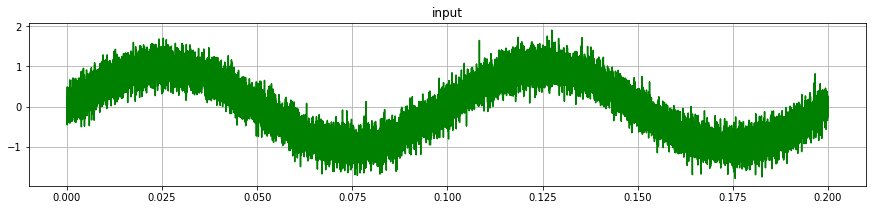

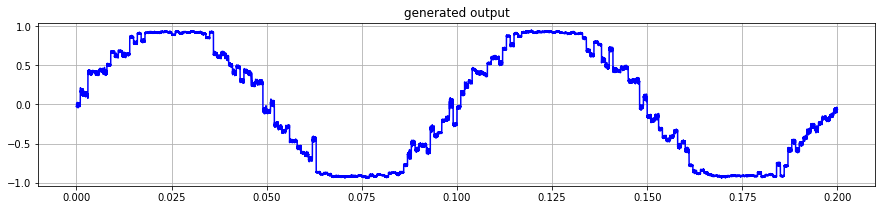

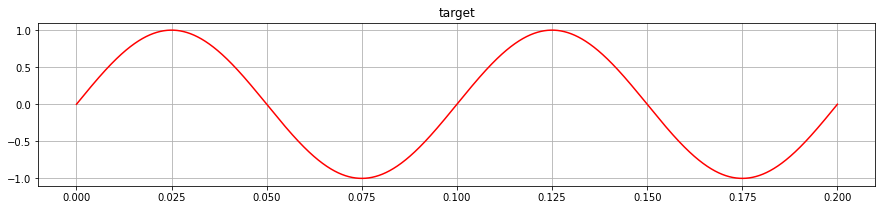

In [640]:
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , noisyInput , 'g' )
plt.title('input')
plt.grid()

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , reshaped_generated_output , 'b' )
plt.title('generated output')
plt.grid()

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , desiredDenoisedOutput , 'r')
plt.title('target')
plt.grid()


In [572]:
# LSTM
model_LSTM=tf.keras.models.Sequential()
model_LSTM.add(tf.keras.layers.LSTM(30, input_shape = (samplingConst,1) ,  activation='tanh' ))
model_LSTM.add(tf.keras.layers.Dense(samplingConst, activation='tanh'))
model_LSTM.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history2 = model_LSTM.fit(x_train, y_train, epochs=30, batch_size= 1, validation_data= (x_validation , y_validation),  verbose=1)


Epoch 1/30
700/700 [==============================] - 20s 25ms/step - loss: 0.0443 - val_loss: 0.0024
Epoch 2/30
700/700 [==============================] - 17s 25ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 3/30
700/700 [==============================] - 17s 24ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4/30
700/700 [==============================] - 17s 24ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 5/30
700/700 [==============================] - 17s 24ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 6/30
700/700 [==============================] - 18s 25ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 7/30
700/700 [==============================] - 17s 25ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 8/30
700/700 [==============================] - 17s 25ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/30
700/700 [==============================] - 19s 27ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 10/30
700/700 [==============================] - 17s 25ms/step - loss: 0.001

In [ ]:
fig = plt.figure()
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('LSTM, Loss History')

In [490]:
generated_output = model_LSTM.predict(x_test)
reshaped_generated_output = generated_output.reshape( (200*samplingConst,1))
noisyInput = x_test.reshape( (200*samplingConst,1))
desiredDenoisedOutput = y_test.reshape(200*samplingConst,1)

In [ ]:
SNR_BEFORE_SINE_RNN = calc_SNR( desiredDenoisedOutput , noisyInput )
SNR_AFTER_SINE_RNN = calc_SNR( desiredDenoisedOutput , reshaped_generated_output )

Text(0.5, 1.0, 'generated output')

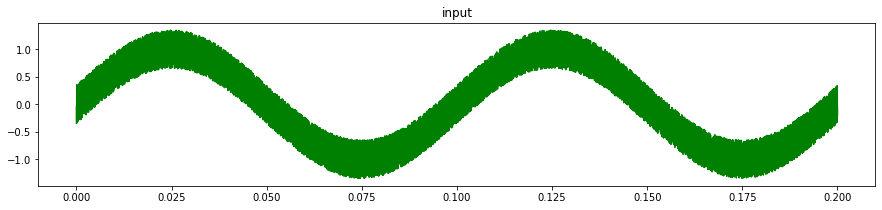

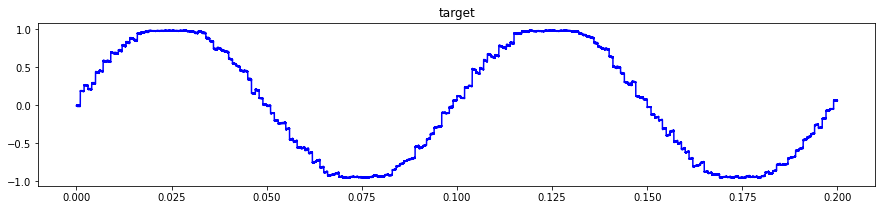

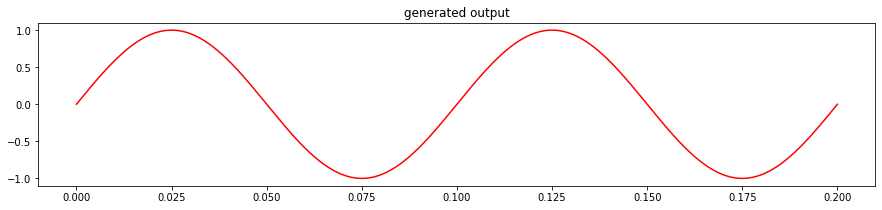

In [491]:
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , noisyInput , 'g' )
plt.title('input')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , reshaped_generated_output , 'b' )
plt.title('generated output')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , desiredDenoisedOutput , 'r')
plt.title('target')

### SAWTOOTH wave noise removal using SIMPLE RNN and LSTM

In [494]:
denoised = SAWTOOTH
noisy= make_noisy(SAWTOOTH)
y_train , y_validation , y_test = denoised[ :700*samplingConst  ]   , denoised[ 700*samplingConst:800*samplingConst ]  , denoised[ 800*samplingConst: ] 
x_train , x_validation , x_test = noisy[ :700*samplingConst ]   , noisy[ 700*samplingConst:800*samplingConst  ]  , noisy[ 800*samplingConst: ]

In [495]:
x_train = x_train.reshape((700,samplingConst,1))
x_validation = x_validation.reshape((100,samplingConst,1))
x_test = x_test.reshape((200,samplingConst,1))

y_train = y_train.reshape((700,samplingConst,1))
y_validation = y_validation.reshape((100,samplingConst,1))
y_test = y_test.reshape((200,samplingConst,1))

In [496]:
# SimpleRNN
SimpleRNNmodel=tf.keras.models.Sequential()
SimpleRNNmodel.add(tf.keras.layers.SimpleRNN(30, input_shape = (samplingConst,1) ,  activation='tanh' ))
SimpleRNNmodel.add(tf.keras.layers.Dense(samplingConst, activation='tanh'))
SimpleRNNmodel.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history3 = SimpleRNNmodel.fit(x_train, y_train, epochs=6, batch_size= 1, validation_data= (x_validation , y_validation),  verbose=1)


Epoch 1/10
700/700 [==============================] - 10s 13ms/step - loss: 0.0522
Epoch 2/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0145
Epoch 3/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0105
Epoch 4/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0083
Epoch 5/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0061
Epoch 6/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0056
Epoch 7/10
700/700 [==============================] - 9s 12ms/step - loss: 0.0066
Epoch 8/10
700/700 [==============================] - 9s 13ms/step - loss: 0.0052
Epoch 9/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0049
Epoch 10/10
700/700 [==============================] - 9s 12ms/step - loss: 0.0050


In [ ]:
fig = plt.figure()
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('simple RNN, SAWTOOTH Loss History')

In [497]:
generated_output = SimpleRNNmodel.predict(x_test)
reshaped_generated_output = generated_output.reshape( (200*samplingConst,1))
noisyInput = x_test.reshape( (200*samplingConst,1))
desiredDenoisedOutput = y_test.reshape(200*samplingConst,1)

In [ ]:
SNR_BEFORE_SINE_RNN = calc_SNR( desiredDenoisedOutput , noisyInput )
SNR_AFTER_SINE_RNN = calc_SNR( desiredDenoisedOutput , reshaped_generated_output )

Text(0.5, 1.0, 'generated output')

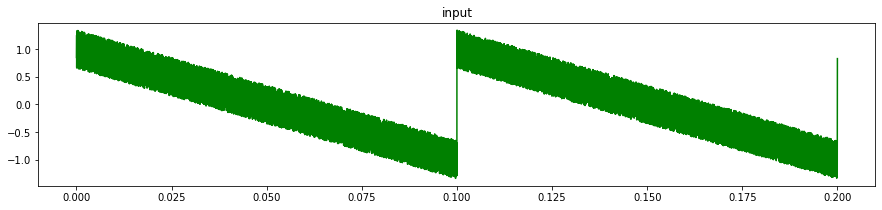

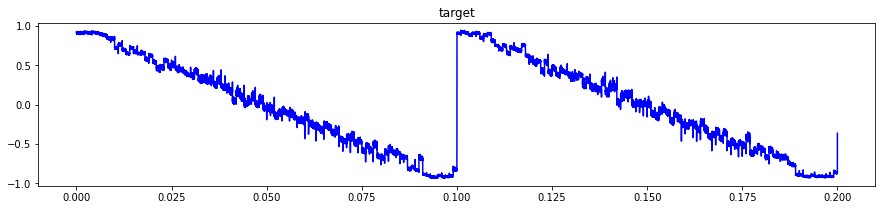

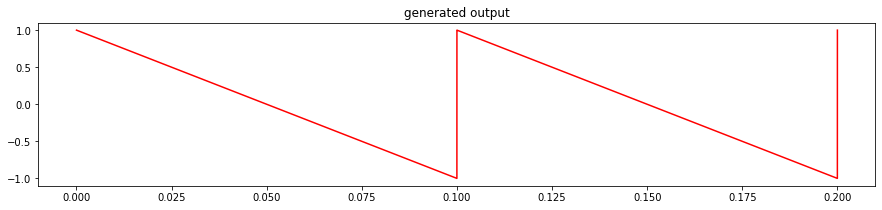

In [498]:
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , noisyInput , 'g' )
plt.title('input')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , reshaped_generated_output , 'b' )
plt.title('generated output')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , desiredDenoisedOutput , 'r')
plt.title('target')


In [499]:
# LSTM
model_LSTM=tf.keras.models.Sequential()
model_LSTM.add(tf.keras.layers.LSTM(30, input_shape = (samplingConst,1) ,  activation='tanh' ))
model_LSTM.add(tf.keras.layers.Dense(samplingConst, activation='tanh'))
model_LSTM.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history4 = model_LSTM.fit(x_train, y_train, epochs=10, batch_size= 1, validation_data= (x_validation , y_validation),  verbose=1)


Epoch 1/10
700/700 [==============================] - 18s 23ms/step - loss: 0.0321
Epoch 2/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0043
Epoch 3/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0037
Epoch 4/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0036
Epoch 5/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0035
Epoch 6/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0034
Epoch 7/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0032
Epoch 8/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0028
Epoch 9/10
700/700 [==============================] - 17s 24ms/step - loss: 0.0028
Epoch 10/10
700/700 [==============================] - 17s 25ms/step - loss: 0.0032


In [ ]:
fig = plt.figure()
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('LSTM, Loss History')

In [500]:
generated_output = model_LSTM.predict(x_test)
reshaped_generated_output = generated_output.reshape( (200*samplingConst,1))
noisyInput = x_test.reshape( (200*samplingConst,1))
desiredDenoisedOutput = y_test.reshape(200*samplingConst,1)

In [ ]:
SNR_BEFORE_SINE_RNN = calc_SNR( desiredDenoisedOutput , noisyInput )
SNR_AFTER_SINE_RNN = calc_SNR( desiredDenoisedOutput , reshaped_generated_output )

Text(0.5, 1.0, 'generated output')

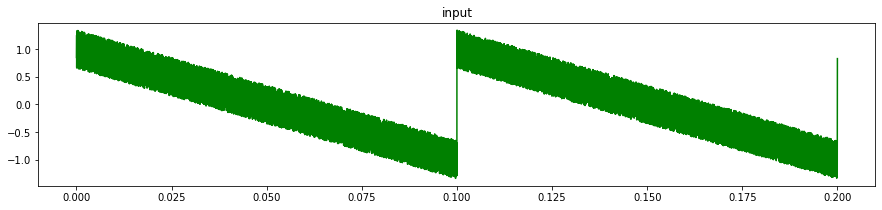

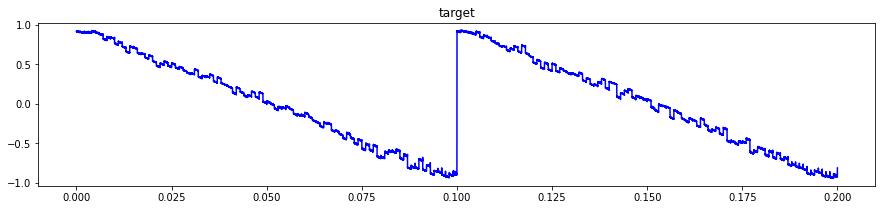

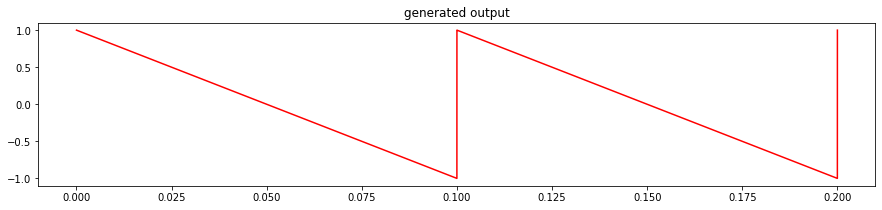

In [501]:
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , noisyInput , 'g' )
plt.title('input')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , reshaped_generated_output , 'b' )
plt.title('generated output')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , desiredDenoisedOutput , 'r')
plt.title('target')


###TRIANGLE wave noise removal using simple RNN and LSTM

In [502]:
denoised = TRIANGLE
noisy= make_noisy(TRIANGLE)
y_train , y_validation , y_test = denoised[ :700*samplingConst  ]   , denoised[ 700*samplingConst:800*samplingConst ]  , denoised[ 800*samplingConst: ] 
x_train , x_validation , x_test = noisy[ :700*samplingConst ]   , noisy[ 700*samplingConst:800*samplingConst  ]  , noisy[ 800*samplingConst: ]

In [503]:
x_train = x_train.reshape((700,samplingConst,1))
x_validation = x_validation.reshape((100,samplingConst,1))
x_test = x_test.reshape((200,samplingConst,1))

y_train = y_train.reshape((700,samplingConst,1))
y_validation = y_validation.reshape((100,samplingConst,1))
y_test = y_test.reshape((200,samplingConst,1))

In [504]:
# SimpleRNN
SimpleRNNmodel=tf.keras.models.Sequential()
SimpleRNNmodel.add(tf.keras.layers.SimpleRNN(30, input_shape = (samplingConst,1) ,  activation='tanh' ))
SimpleRNNmodel.add(tf.keras.layers.Dense(samplingConst, activation='tanh'))
SimpleRNNmodel.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history5 = SimpleRNNmodel.fit(x_train, y_train, epochs=10, batch_size= 1, validation_data= (x_validation , y_validation),  verbose=1)


Epoch 1/10
700/700 [==============================] - 9s 12ms/step - loss: 0.0395
Epoch 2/10
700/700 [==============================] - 9s 12ms/step - loss: 0.0125
Epoch 3/10
700/700 [==============================] - 8s 11ms/step - loss: 0.0116
Epoch 4/10
700/700 [==============================] - 8s 11ms/step - loss: 0.0121
Epoch 5/10
700/700 [==============================] - 9s 12ms/step - loss: 0.0100
Epoch 6/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0087
Epoch 7/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0082
Epoch 8/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0081
Epoch 9/10
700/700 [==============================] - 9s 12ms/step - loss: 0.0071
Epoch 10/10
700/700 [==============================] - 8s 12ms/step - loss: 0.0064


In [ ]:
fig = plt.figure()
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('simple RNN, SAWTOOTH Loss History')

In [505]:
generated_output = SimpleRNNmodel.predict(x_test)
reshaped_generated_output = generated_output.reshape( (200*samplingConst,1))
noisyInput = x_test.reshape( (200*samplingConst,1))
desiredDenoisedOutput = y_test.reshape(200*samplingConst,1)

In [ ]:
SNR_BEFORE_SINE_RNN = calc_SNR( desiredDenoisedOutput , noisyInput )
SNR_AFTER_SINE_RNN = calc_SNR( desiredDenoisedOutput , reshaped_generated_output )

Text(0.5, 1.0, 'generated output')

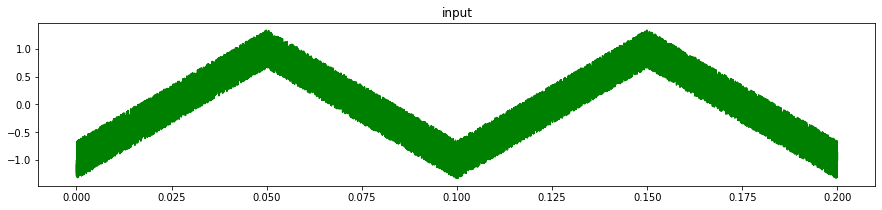

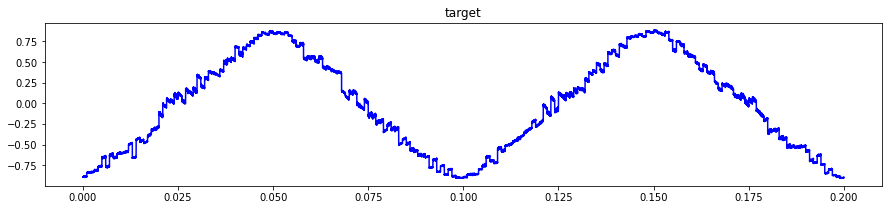

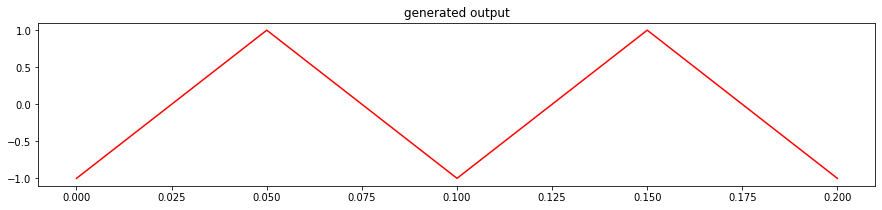

In [506]:
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , noisyInput , 'g' )
plt.title('input')
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , reshaped_generated_output , 'b' )
plt.title('generated output')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , desiredDenoisedOutput , 'r')
plt.title('target')


In [507]:
# LSTM
model_LSTM=tf.keras.models.Sequential()
model_LSTM.add(tf.keras.layers.LSTM(30, input_shape = (samplingConst,1) ,  activation='tanh' ))
model_LSTM.add(tf.keras.layers.Dense(samplingConst, activation='tanh'))
model_LSTM.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history6 = model_LSTM.fit(x_train, y_train, epochs=10, batch_size= 1, validation_data= (x_validation , y_validation),  verbose=1)


Epoch 1/10
700/700 [==============================] - 17s 22ms/step - loss: 0.0303
Epoch 2/10
700/700 [==============================] - 16s 22ms/step - loss: 0.0048
Epoch 3/10
700/700 [==============================] - 16s 22ms/step - loss: 0.0047
Epoch 4/10
700/700 [==============================] - 15s 21ms/step - loss: 0.0039
Epoch 5/10
700/700 [==============================] - 16s 23ms/step - loss: 0.0039
Epoch 6/10
700/700 [==============================] - 15s 22ms/step - loss: 0.0039
Epoch 7/10
700/700 [==============================] - 15s 22ms/step - loss: 0.0035
Epoch 8/10
700/700 [==============================] - 16s 22ms/step - loss: 0.0036
Epoch 9/10
700/700 [==============================] - 16s 22ms/step - loss: 0.0033
Epoch 10/10
700/700 [==============================] - 15s 21ms/step - loss: 0.0036


In [ ]:
fig = plt.figure()
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('LSTM, Loss History')

In [508]:
generated_output = model_LSTM.predict(x_test)
reshaped_generated_output = generated_output.reshape( (200*samplingConst,1))
noisyInput = x_test.reshape( (200*samplingConst,1))
desiredDenoisedOutput = y_test.reshape(200*samplingConst,1)

In [ ]:
SNR_BEFORE_SINE_RNN = calc_SNR( desiredDenoisedOutput , noisyInput )
SNR_AFTER_SINE_RNN = calc_SNR( desiredDenoisedOutput , reshaped_generated_output )

Text(0.5, 1.0, 'generated output')

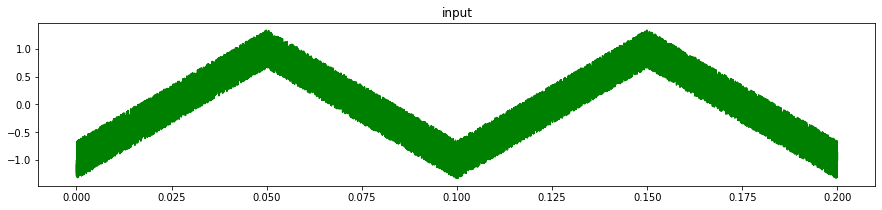

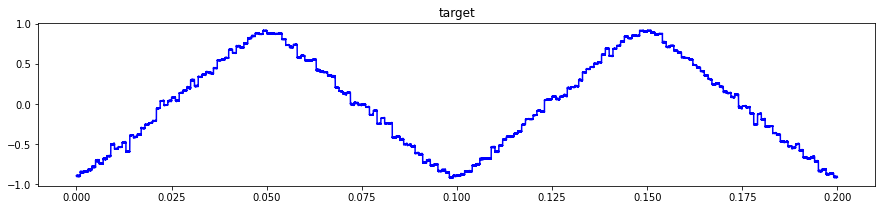

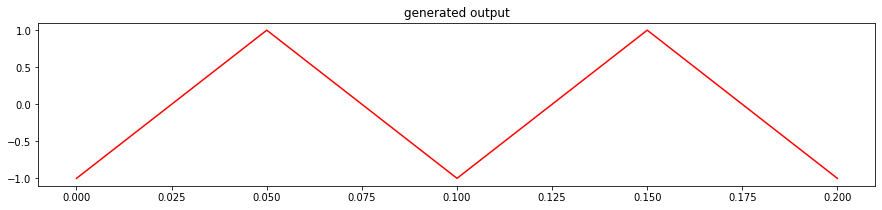

In [509]:
plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , noisyInput , 'g' )
plt.title('input')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , reshaped_generated_output , 'b' )
plt.title('generated output')

plt.figure(figsize = figSize)
plt.plot (timePoints[:200*samplingConst] , desiredDenoisedOutput , 'r')
plt.title('target')